学习贝叶斯Meta分析

# 先验分布

一般用无信息先验分布或弱信息先验分布。

In [2]:
install.packages("extraDistr")


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpEP2J4M/downloaded_packages


In [3]:
library(extraDistr)
phcauchy(0.3, sigma = 0.3)

[1] 0.5

# 准备工作

In [4]:
install.packages("brms")

also installing the dependencies 'StanHeaders', 'inline', 'RcppParallel', 'QuickJSR', 'tensorA', 'distributional', 'ggridges', 'Brobdingnag', 'rstan', 'loo', 'posterior', 'rstantools', 'bayesplot', 'bridgesampling', 'nleqslv'





The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpEP2J4M/downloaded_packages


In [5]:
library(brms)

Loading required package: Rcpp

Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: 'brms'


The following objects are masked from 'package:extraDistr':

    ddirichlet, dfrechet, pfrechet, qfrechet, rdirichlet, rfrechet


The following object is masked from 'package:stats':

    ar




In [16]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::rdunif() masks extraDistr::rdunif()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [27]:
# 读取数据集ThirdWave
load("./dmatar_data/ThirdWave.rda")
ThirdWave

Author,TE,seTE,RiskOfBias,TypeControlGroup,InterventionDuration,InterventionType,ModeOfDelivery
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Call et al.,0.7091362,0.2608202,high,WLC,short,mindfulness,group
Cavanagh et al.,0.3548641,0.1963624,low,WLC,short,mindfulness,online
DanitzOrsillo,1.7911700,0.3455692,high,WLC,short,ACT,group
de Vibe et al.,0.1824552,0.1177874,low,no intervention,short,mindfulness,group
Frazier et al.,0.4218509,0.1448128,low,information only,short,PCI,online
Frogeli et al.,0.6300000,0.1960000,low,no intervention,short,ACT,group
Gallego et al.,0.7248838,0.2246641,high,no intervention,long,mindfulness,group
Hazlett-Stevens & Oren,0.5286638,0.2104609,low,no intervention,long,mindfulness,book
Hintz et al.,0.2840000,0.1680000,low,information only,short,PCI,online


# 模型拟合

In [38]:
# 指定先验分布
priors <- c(
  prior(normal(0, 1), class = Intercept),
  prior(cauchy(0, 0.5), class = sd)
)

In [39]:
m.brm <- brm(
  TE|se(seTE) ~ 1 + (1|Author),
  data = ThirdWave,
  prior = priors,
  iter = 4000
)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.091 seconds (Warm-up)
Chain 1:                0.071 seconds (Sampling)
Chain 1:                0.16

In [41]:
summary(m.brm)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: TE | se(seTE) ~ 1 + (1 | Author) 
   Data: ThirdWave (Number of observations: 18) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~Author (Number of levels: 18) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.30      0.10     0.12     0.52 1.00     2659     4063

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.57      0.09     0.40     0.77 1.00     3541     3402

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.00      0.00     0.00     0.00   NA       NA       NA

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at converge

Using 10 posterior draws for ppc type 'dens_overlay' by default.



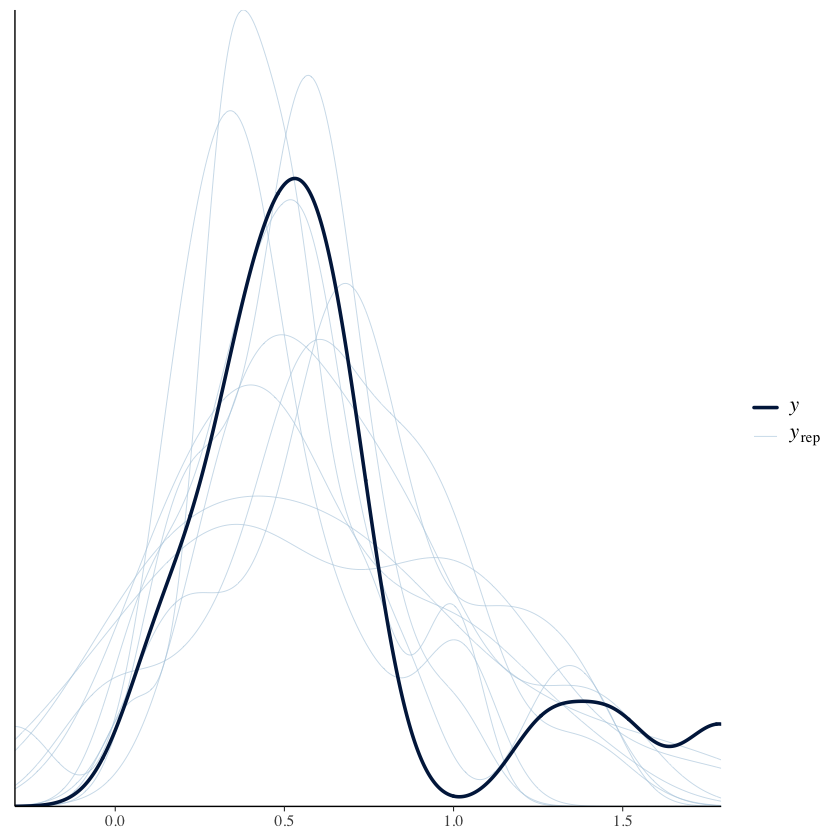

In [42]:
pp_check(m.brm)

# 结果解释

In [43]:
ranef(m.brm)

$Author
, , Intercept

                          Estimate Est.Error         Q2.5       Q97.5
Call et al.             0.07172333 0.1988474 -0.312191650  0.47762962
Cavanagh et al.        -0.14407900 0.1748704 -0.502342802  0.18487578
DanitzOrsillo           0.49276664 0.2848202  0.001958156  1.09423721
Frazier et al.         -0.11656275 0.1514502 -0.422920408  0.16733472
Frogeli et al.          0.03345693 0.1717895 -0.310548015  0.36908073
Gallego et al.          0.08788866 0.1843663 -0.272530197  0.46137788
Hazlett-Stevens & Oren -0.02838734 0.1771165 -0.391181389  0.31586888
Hintz et al.           -0.20994085 0.1691379 -0.553657639  0.10832223
Kang et al.             0.29278770 0.2428203 -0.146671054  0.80169397
Kuhlmann et al.        -0.31108323 0.1893710 -0.702328590  0.03025542
Lever Taylor et al.    -0.11020307 0.1925642 -0.513416089  0.24581438
Phang et al.           -0.02038380 0.1920387 -0.401627074  0.35841203
Rasanen et al.         -0.07939818 0.1992681 -0.489515842  0.29494403
Ratanasiripong         -0.03052761 0.2327238 -0.512061235  0.42427554
Shapiro et al.          0.40425272 0.2551225 -0.041849506  0.94660552
Song & Lindquist        0.02048657 0.1842806 -0.341721511  0.38563363
Warnecke et al.         0.01211641 0.1880424 -0.363387381  0.37968487
de Vibe et al.         -0.32408423 0.1474082 -0.624391489 -0.04985519

In [44]:
post.samples <- posterior_samples(m.brm, c("^b", "^sd"))
names(post.samples)

Warning message:
"Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives."


[1] "b_Intercept"          "sd_Author__Intercept"

In [46]:
names(post.samples) <- c("smd", "tau")

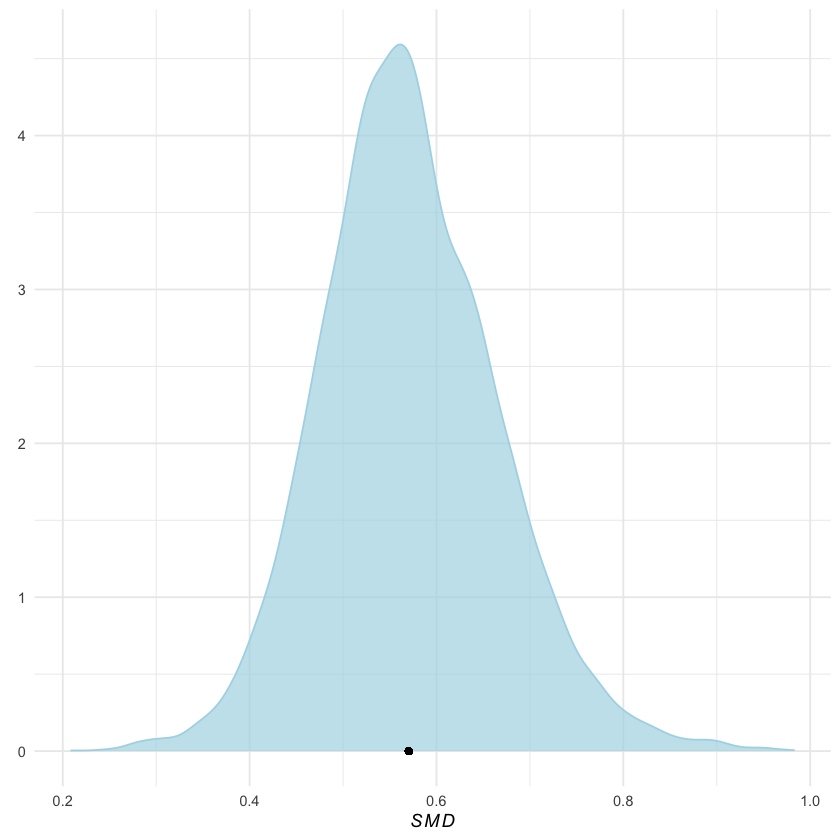

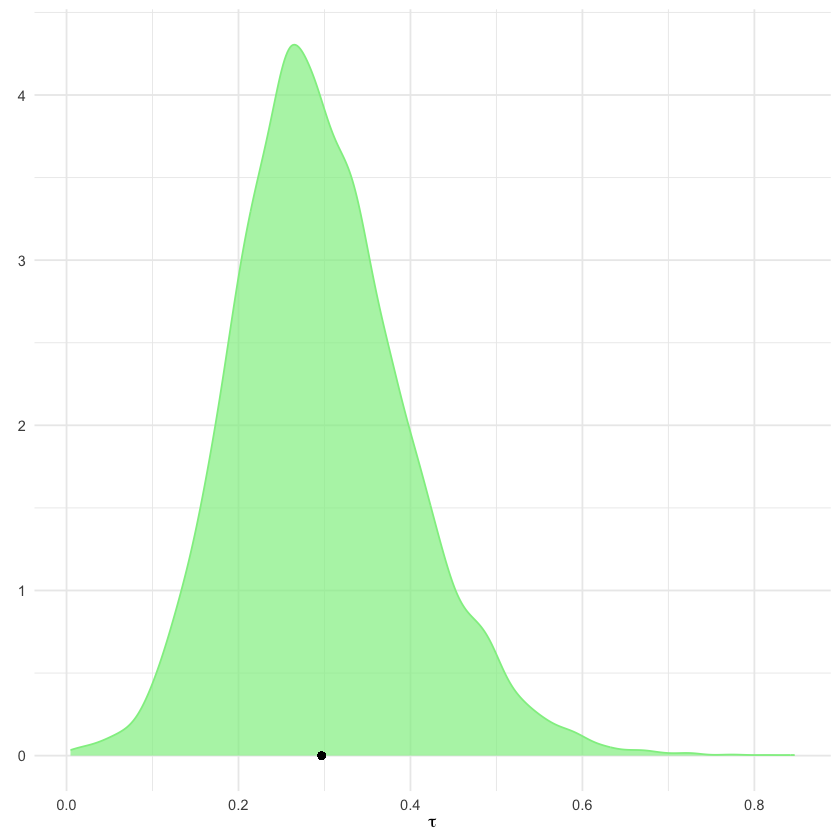

In [47]:
ggplot(aes(x = smd), data = post.samples) +
  geom_density(fill = "lightblue",                # set the color
               color = "lightblue", alpha = 0.7) +  
  geom_point(y = 0,                               # add point at mean
             x = mean(post.samples$smd)) +
  labs(x = expression(italic(SMD)),
       y = element_blank()) +
  theme_minimal()

ggplot(aes(x = tau), data = post.samples) +
  geom_density(fill = "lightgreen",               # set the color
               color = "lightgreen", alpha = 0.7) +  
  geom_point(y = 0, 
             x = mean(post.samples$tau)) +        # add point at mean
    labs(x = expression(tau),
       y = element_blank()) +
  theme_minimal()

In [48]:
smd.ecdf <- ecdf(post.samples$smd)
smd.ecdf(0.3)

[1] 0.0025

# 手搓Meta分析

## 固定效应模型

使用{R2jags}包调用JAGS直接手搓。

In [49]:
# 加载必要的包
library(R2jags)

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




我们使用的数据如下图：

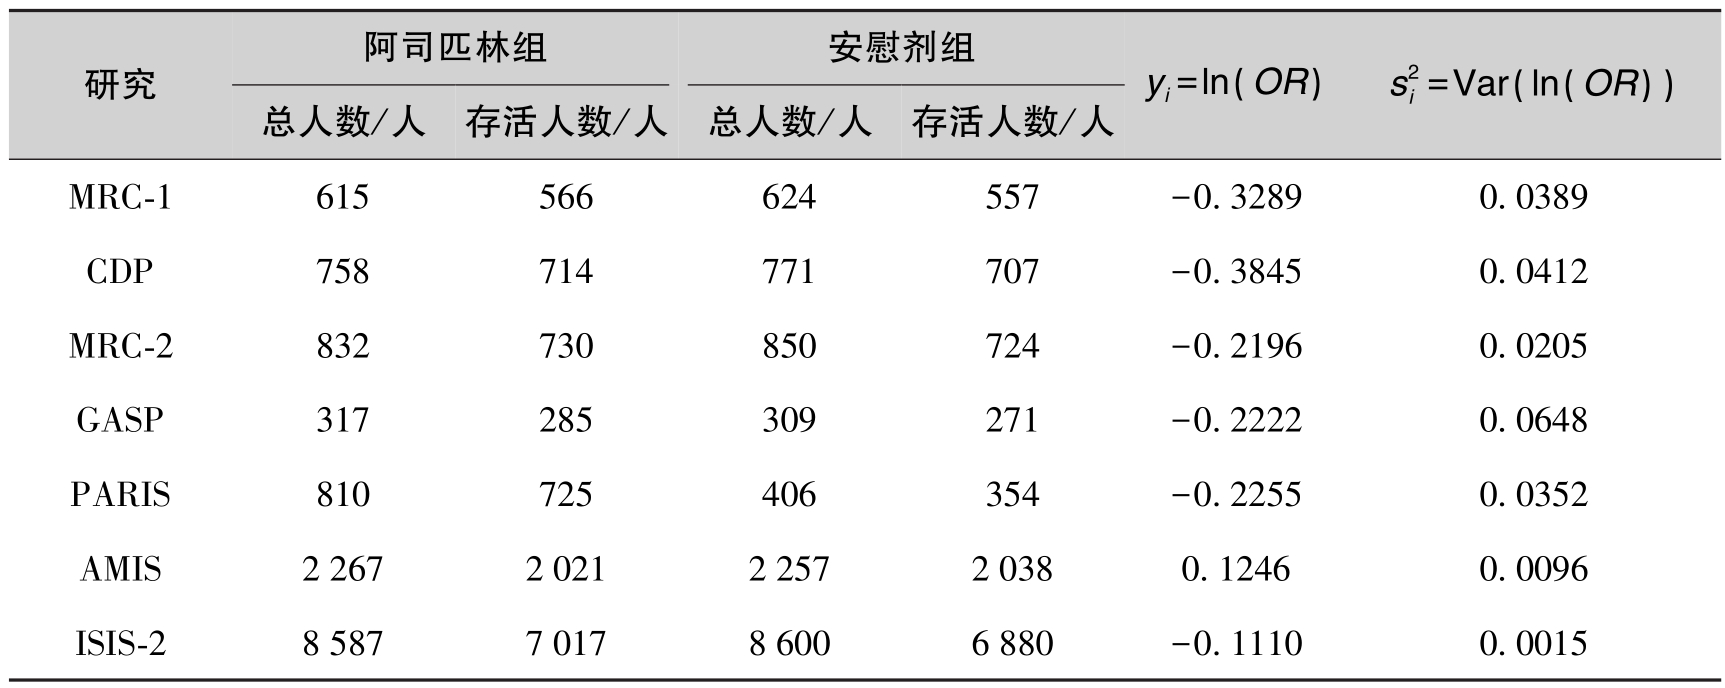

In [53]:
# 设置种子便于复现结果
set.seed(12345)

# 把数据录进来
data <- list(
  ns = 7,  # 7个研究
  y = c(-0.3289011, -0.3845458, -0.2195622, -0.2222206,
        -0.2254672, 0.1246363, -0.1109658),  # 每个研究的效应大小
  V = c(0.0388957, 0.0411673, 0.0204915, 0.0647646,
        0.0351996, 0.0096167, 0.0015062)  # 每个研究的效应大小的方差
)

# 指定初始值
fe_inits <- function() {
  list(
    d = 0
  )
}

# 指定未知参数
fe_params <- c("d", "OR")

In [54]:
# 构建模型
fe_model <- function() {
  # 指定似然函数
  for (i in 1:ns) {
    prec[i] <- 1 / V[i]  # 贝叶斯中方差的倒数称为精度
    y[i] ~ dnorm(d, prec[i])
  }

  # 指定先验分布
  d ~ dnorm(0, 0.00001)

  # 计算OR
  OR <- exp(d)
}

In [63]:
# 运行模型
fe_result <- jags(
  data = data,
  inits = fe_inits,
  parameters.to.save = fe_params,
  model.file = fe_model,
  n.chains = 2
)

print(fe_result)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 1
   Total graph size: 27

Initializing model

Inference for Bugs model at "/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpEP2J4M/model15aa62e378ad2.txt", fit using jags,
 2 chains, each with 2000 iterations (first 1000 discarded)
 n.sims = 2000 iterations saved. Running time = 0.003 secs
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
OR         0.897   0.030  0.838  0.877  0.898  0.917  0.958 1.001  2000
d         -0.109   0.033 -0.177 -0.131 -0.108 -0.087 -0.043 1.001  2000
deviance  -3.730   1.444 -4.739 -4.639 -4.293 -3.421  0.520 1.001  2000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule: pV = var(deviance)/2)
pV = 1.0 and DIC = -2.7
DIC is an estimate of expected predi

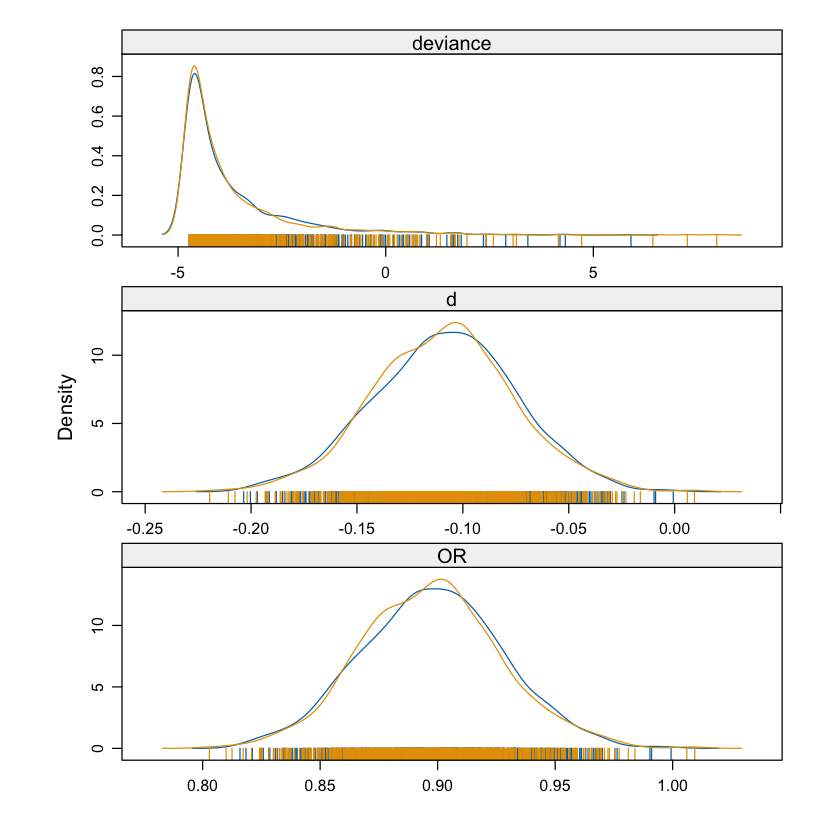

In [64]:
# 绘制核密度图
library(lattice)

densityplot(as.mcmc(fe_result))

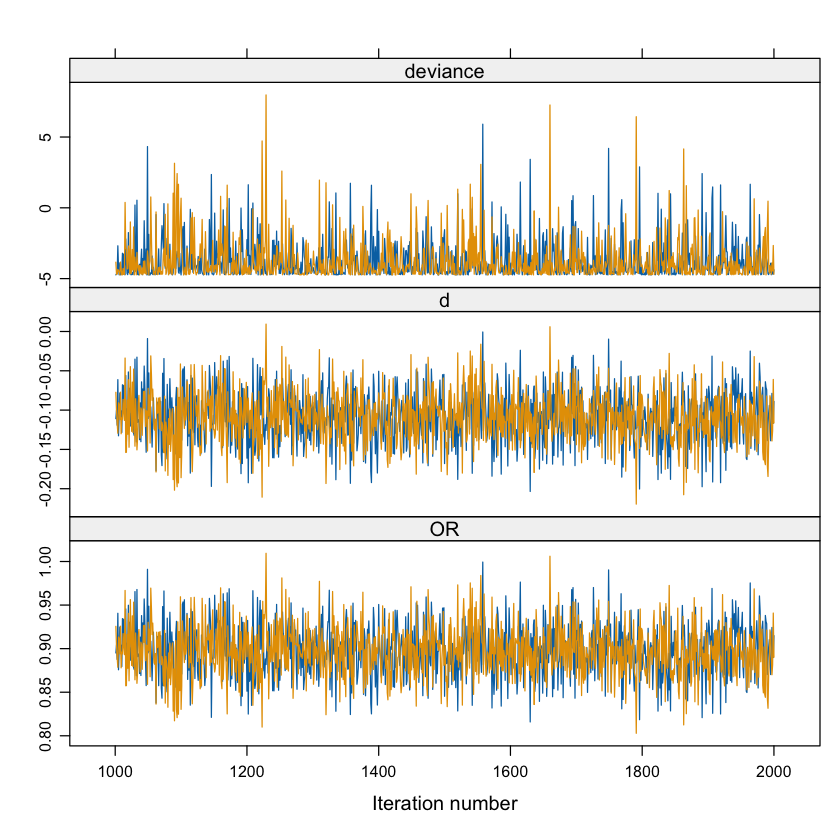

In [65]:
xyplot(as.mcmc(fe_result))

## 随机效应模型

In [66]:
# 定义初始值
re_inits <- function() {
  list(
    d = 0,
    tau = 1
  )
}

# 定义未知参数
re_params <- c("d", "tau2", "OR")

In [71]:
# 定义模型
re_model <- function() {
  # 指定似然函数
  for (i in 1:ns) {
    prec[i] <- 1 / V[i]  # 贝叶斯中方差的倒数称为精度
    y[i] ~ dnorm(delta[i], prec[i])
    delta[i] ~ dnorm(d, dprec)
  }

  # 指定先验分布
  d ~ dnorm(0, 0.00001)
  tau ~ dunif(0, 10)
  tau2 <- tau^2
  dprec <- 1 / tau2

  # 计算OR
  OR <- exp(d)
}

In [84]:
set.seed(12345)

re_result <- jags(
  data = data,
  inits = re_inits,
  parameters.to.save = re_params,
  model.file = re_model,
  n.chains = 3,
  n.iter = 10000
)

print(re_result)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 9
   Total graph size: 39

Initializing model

Inference for Bugs model at "/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpEP2J4M/model15aa63f8f866f.txt", fit using jags,
 3 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 3000 iterations saved. Running time = 0.051 secs
         mu.vect sd.vect    2.5%     25%    50%    75%  97.5%  Rhat n.eff
OR         0.868   0.086   0.702   0.821  0.870  0.914  1.027 1.001  3000
d         -0.147   0.099  -0.354  -0.197 -0.140 -0.090  0.026 1.001  3000
tau2       0.041   0.067   0.000   0.007  0.021  0.049  0.203 1.008   410
deviance  -7.970   3.313 -13.134 -10.582 -8.372 -5.736 -0.865 1.001  3000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (usi

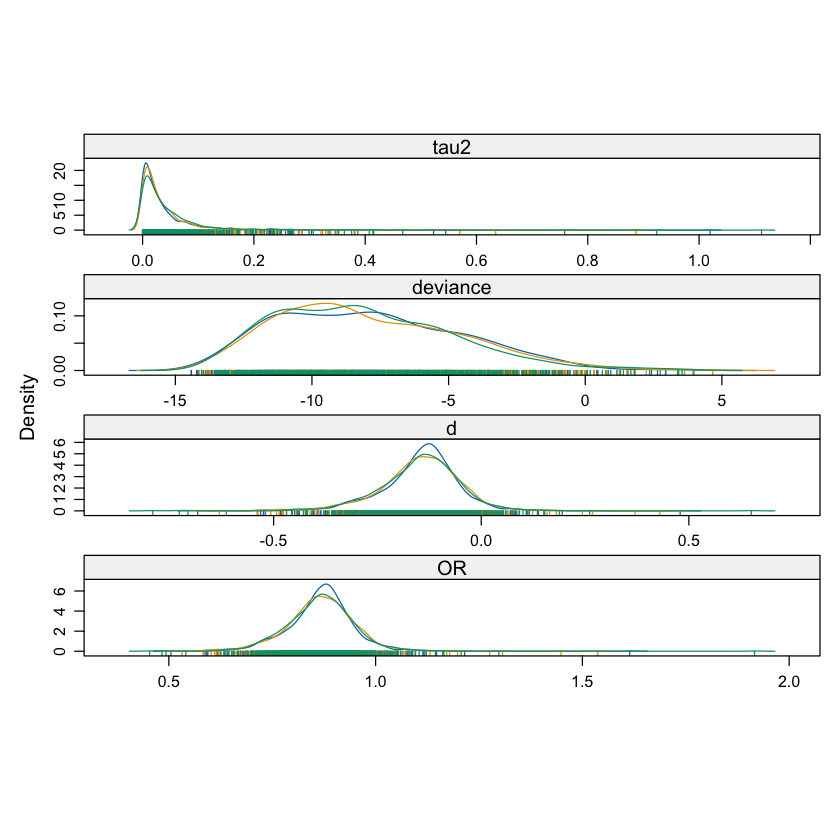

In [85]:
# 核密度估计图
densityplot(as.mcmc(re_result))

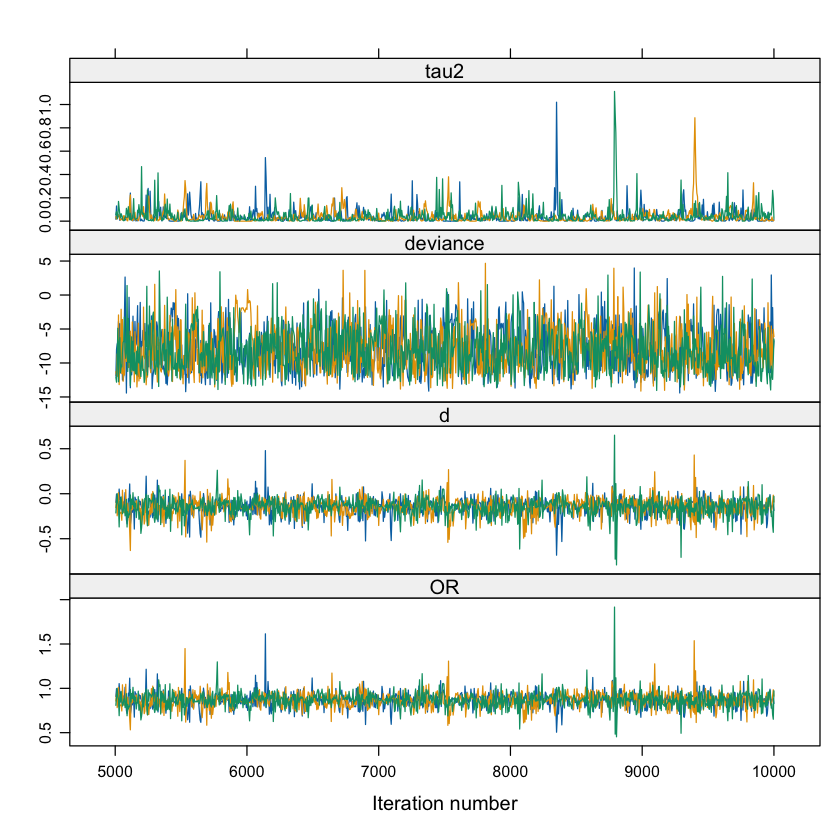

In [86]:
# 踪迹图
xyplot(as.mcmc(re_result))